In [12]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [32]:
# Import the dataset
dataset = pd.read_csv('AABA_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [33]:
print(dataset.index)

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=3019, freq=None)


In [34]:
training_set = dataset[:'2016'].iloc[:, 1:2].values  # Using the 'High' column
test_set = dataset['2017':].iloc[:, 1:2].values

In [35]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

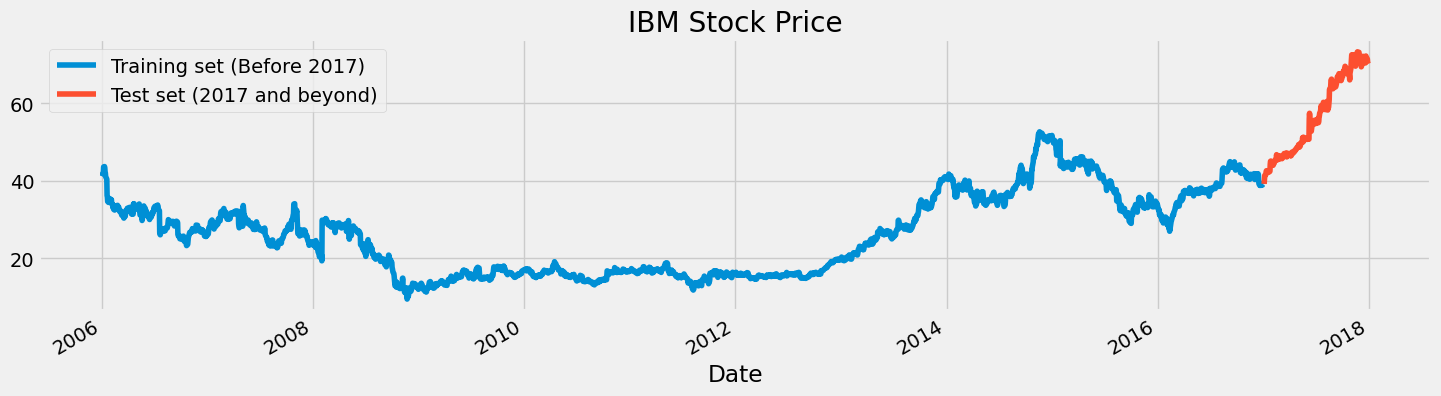

In [36]:
# Plotting the training and test sets
dataset["High"][:'2016'].plot(figsize=(16, 4), legend=True)
dataset["High"]['2017':].plot(figsize=(16, 4), legend=True)
plt.legend(['Training set (Before 2017)', 'Test set (2017 and beyond)'])
plt.title('IBM Stock Price')
plt.show()

In [39]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [41]:
# Creating the data structure with 60 timesteps

X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [42]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [43]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
85/85 [==============================] - 15s 73ms/step - loss: 0.0176
Epoch 2/50
85/85 [==============================] - 6s 72ms/step - loss: 0.0069
Epoch 3/50
85/85 [==============================] - 7s 86ms/step - loss: 0.0061
Epoch 4/50
85/85 [==============================] - 8s 97ms/step - loss: 0.0049
Epoch 5/50
85/85 [==============================] - 8s 100ms/step - loss: 0.0045
Epoch 6/50
85/85 [==============================] - 8s 96ms/step - loss: 0.0039
Epoch 7/50
85/85 [==============================] - 7s 79ms/step - loss: 0.0037
Epoch 8/50
85/85 [==============================] - 6s 70ms/step - loss: 0.0034
Epoch 9/50
85/85 [==============================] - 6s 72ms/step - loss: 0.0030
Epoch 10/50
85/85 [==============================] - 8s 99ms/step - loss: 0.0030
Epoch 11/50
85/85 [==============================] - 9s 100ms/step - loss: 0.0028
Epoch 12/50
85/85 [==============================] - 9s 100ms/step - loss: 0.0025
Epoch 13/50
85/85 [==============

In [44]:
dataset_total = pd.concat((dataset["High"][:'2016'], dataset["High"]['2017':]), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [45]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 3s 45ms/step


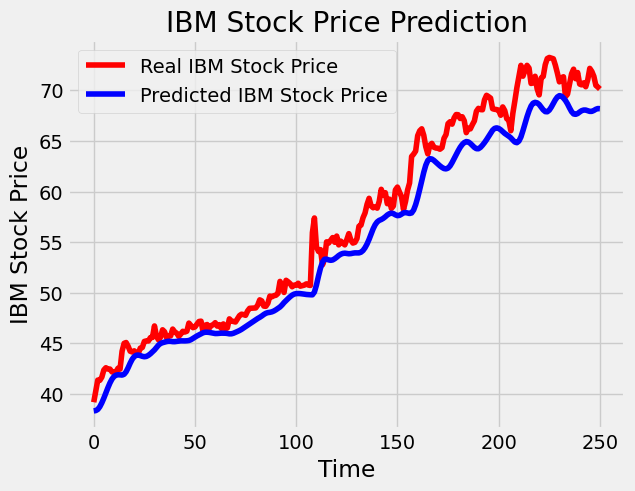

In [46]:
def plot_predictions(test, predicted):
    plt.plot(test, color='red', label='Real IBM Stock Price')
    plt.plot(predicted, color='blue', label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

plot_predictions(test_set, predicted_stock_price)